<a href="https://colab.research.google.com/github/Shrey327/Machine_Learning/blob/main/Neural_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
x = tf.ones(shape=(2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [ ]:
x = tf.zeros(shape=(2,1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [ ]:
x = tf.random.normal(shape=(3,1),mean=0.,stddev=1.)
print(x)

tf.Tensor(
[[-0.37838492]
 [-0.13557497]
 [ 0.8740901 ]], shape=(3, 1), dtype=float32)


In [ ]:
x = tf.random.uniform(shape=(1,3),minval=0.,maxval=1.)
print(x)

tf.Tensor([[0.67500675 0.0607245  0.3259368 ]], shape=(1, 3), dtype=float32)


In [ ]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-1.6502545 ],
       [-0.61169165],
       [ 0.29296646]], dtype=float32)>


In [ ]:
v.assign(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
v.assign_add(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [ ]:
a = tf.ones((2,2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

In [ ]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [ ]:
time = tf.Variable(0.)
with tf.GradientTape () as outer_tape:
    with tf.GradientTape() as tape:
        position = 4.9 * time ** 2
    speed = tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

In [ ]:
print(acceleration)

tf.Tensor(9.8, shape=(), dtype=float32)


In [ ]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)

In [ ]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [ ]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

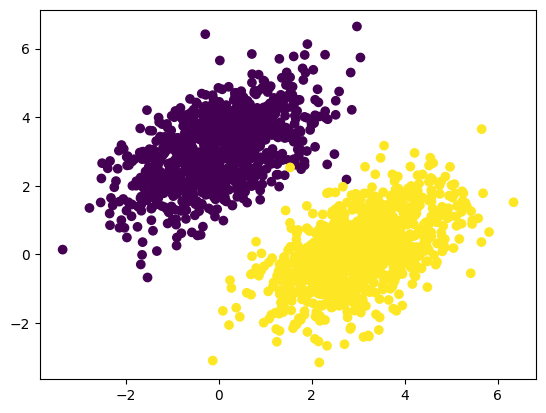

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [ ]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))


In [ ]:
def model(inputs):
    return tf.matmul(inputs, W) + b


In [ ]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

#

In [ ]:
learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
  gradients = tape.gradient(loss, [W, b])
  W.assign_sub(gradients[0] * learning_rate)
  b.assign_sub(gradients[1] * learning_rate)
  return loss

In [ ]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 6.5258
Loss at step 1: 1.1527
Loss at step 2: 0.3144
Loss at step 3: 0.1750
Loss at step 4: 0.1443
Loss at step 5: 0.1312
Loss at step 6: 0.1216
Loss at step 7: 0.1131
Loss at step 8: 0.1055
Loss at step 9: 0.0985
Loss at step 10: 0.0921
Loss at step 11: 0.0862
Loss at step 12: 0.0809
Loss at step 13: 0.0760
Loss at step 14: 0.0715
Loss at step 15: 0.0674
Loss at step 16: 0.0637
Loss at step 17: 0.0603
Loss at step 18: 0.0572
Loss at step 19: 0.0543
Loss at step 20: 0.0517
Loss at step 21: 0.0493
Loss at step 22: 0.0471
Loss at step 23: 0.0451
Loss at step 24: 0.0433
Loss at step 25: 0.0417
Loss at step 26: 0.0401
Loss at step 27: 0.0387
Loss at step 28: 0.0375
Loss at step 29: 0.0363
Loss at step 30: 0.0353
Loss at step 31: 0.0343
Loss at step 32: 0.0334
Loss at step 33: 0.0326
Loss at step 34: 0.0318
Loss at step 35: 0.0312
Loss at step 36: 0.0305
Loss at step 37: 0.0300
Loss at step 38: 0.0295
Loss at step 39: 0.0290


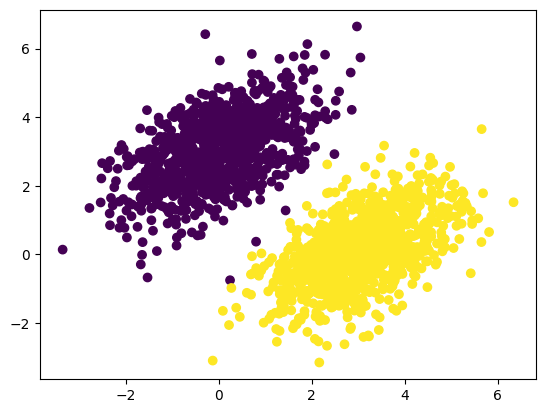

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

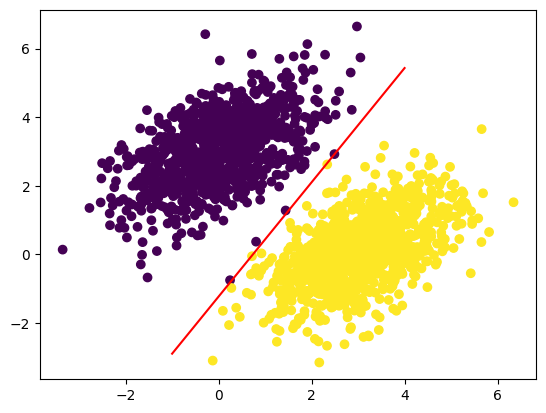

In [ ]:
x = np.linspace(-1, 4, 100)
y = -W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

In [ ]:
from tensorflow import keras
class SimpleDense(keras.layers.Layer):
   def __init__(self, units, activation=None):
      super().__init__()
      self.units = units
      self.activation = activation
   def build(self, input_shape):
      input_dim = input_shape[-1]
      self.W = self.add_weight(shape=(input_dim, self.units),
                initializer="random_normal")
      self.b = self.add_weight(shape=(self.units,),
                initializer="zeros")
   def call(self, inputs):
      y = tf.matmul(inputs, self.W) + self.b
      if self.activation is not None:
        y = self.activation(y)
      return y

In [ ]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


In [ ]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")